## Sampling in Python

+ population vs. sample
+ working with feather files
  + nice tutorial here: https://www.askpython.com/python-modules/pandas/load-using-read_feather

### Spotify data

In [1]:
import pandas as pd
import numpy as np

spotify_population = pd.read_feather('./data/spotify_2000_2020.feather')
print(spotify_population.columns)
# print(spotify_population.head())

Index(['acousticness', 'artists', 'danceability', 'duration_ms',
       'duration_minutes', 'energy', 'explicit', 'id', 'instrumentalness',
       'key', 'liveness', 'loudness', 'mode', 'name', 'popularity',
       'release_date', 'speechiness', 'tempo', 'valence', 'year'],
      dtype='object')


In [2]:
# Sample 1000 rows from spotify_population
spotify_sample = spotify_population.sample(n=1000)

# Print the sample
print(spotify_sample.head())

# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

       acousticness                      artists  danceability  duration_ms  \
33009         0.282                ['Nicky Jam']         0.832     198707.0   
28824         0.656  ['GoldLink', 'Hare Squead']         0.885     183760.0   
15073         0.139             ['Chris Tomlin']         0.471     266587.0   
27464         0.139        ['Hawthorne Heights']         0.434     239520.0   
15684         0.408            ['Carlos Y Jose']         0.661     207673.0   

       duration_minutes  energy  explicit                      id  \
33009          3.311783   0.608       0.0  5Fim1gaXBgsiFfsQAfQSDS   
28824          3.062667   0.595       1.0  564oa00vY05d1uYnTEAAmE   
15073          4.443117   0.626       0.0  2JdhRRTl3ee6pQQupVQqyb   
27464          3.992000   0.556       0.0  0AySNcxAWo6RKotzZgvm96   
15684          3.461217   0.485       0.0  3FJjpxv95LLjQPIVrPhntF   

       instrumentalness  key  liveness  loudness  mode                  name  \
33009          0.000000  6.0  

In [3]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = spotify_population["loudness"].sample(n=100)

# Calculate the mean of loudness_pop
mean_loudness_pop = loudness_pop.mean()

# Calculate the mean of loudness_samp
mean_loudness_samp = loudness_samp.mean()

print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353947
-7.387589999999999


### Are these finding generalizable?

The left distribution below represents the population. The right distribution is from a sample of unknown origin. Does the sample look like it came from the population on the left?... Unlikely.

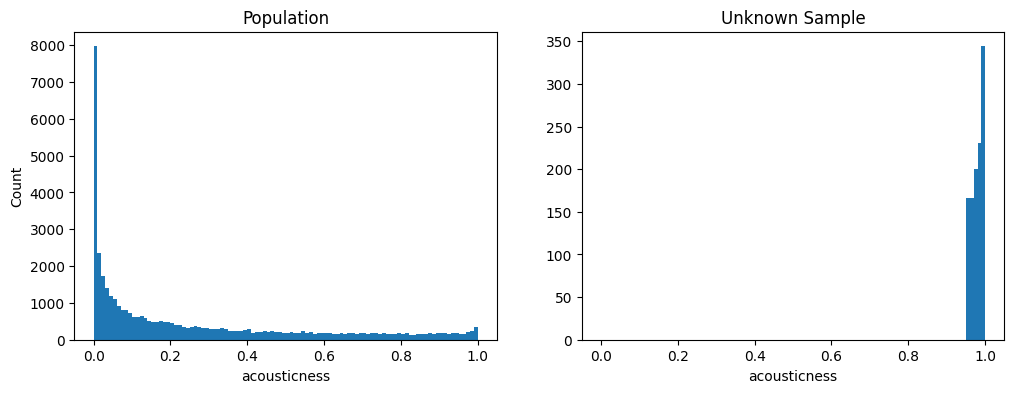

In [4]:
import matplotlib.pyplot as plt

# read in spotify_mysterious_sample
spotify_mysterious_sample = pd.read_csv("./data/spotify_mysterious_sample1.csv")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax[0].hist(spotify_population["acousticness"], bins=np.arange(0, 1.01, 0.01))
ax[1].hist(spotify_mysterious_sample['acousticness'], bins=np.arange(0, 1.01, 0.01))

ax[0].set_title("Population")
ax[0].set_xlabel("acousticness")
ax[0].set_ylabel("Count")

ax[1].set_title("Unknown Sample")
ax[1].set_xlabel("acousticness")

# Visualize these distributions side-by-side
plt.show()

### How about these two?

The sample of the right looks much more likely to have come from the population on the left.

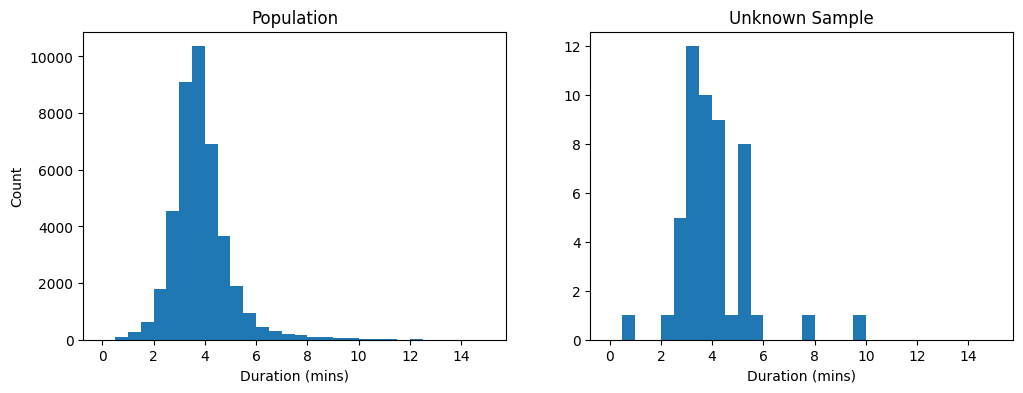

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# read in spotify_mysterious_sample2
spotify_mysterious_sample2 = pd.read_csv("./data/spotify_mysterious_sample2.csv")

ax[0].hist(spotify_population['duration_minutes'], bins=np.arange(0, 15.5, 0.5))
ax[1].hist(spotify_mysterious_sample2['duration_minutes'], bins=np.arange(0, 15.5, 0.5))

ax[0].set_title("Population")
ax[0].set_xlabel("Duration (mins)")
ax[0].set_ylabel("Count")

ax[1].set_title("Unknown Sample")
ax[1].set_xlabel("Duration (mins)")

# Visualize these distributions side-by-side
plt.show()

## Pseudo-random number generation

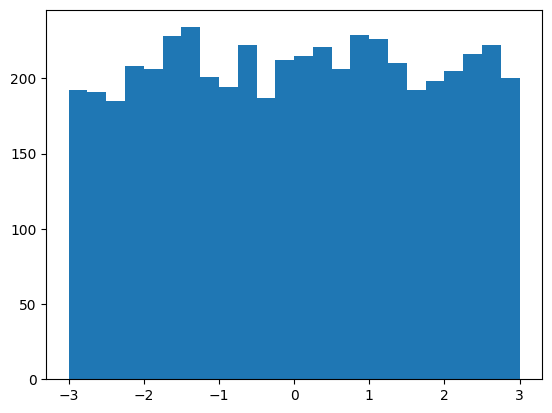

In [6]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms, bins=np.arange(-3, 3.25, 0.25))
plt.show()

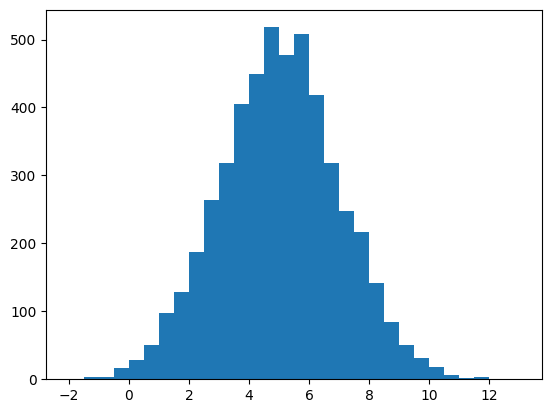

In [7]:
# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals, bins=np.arange(-2, 13.5, 0.5))
plt.show()

In [8]:
import numpy as np
np.random.seed(123)
x = np.random.normal(size=5)
y = np.random.normal(size=5)
print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[ 1.65143654 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]


In [9]:
# setting the seed to the same value can be used to ensure reproducibility
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(123)
y = np.random.normal(size=5)
print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]


In [10]:
# setting the seed to different values will generate different sets of random values
np.random.seed(123)
x = np.random.normal(size=5)
np.random.seed(456)
y = np.random.normal(size=5)
print(x)
print(y)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025]
[-0.6681285  -0.49820952  0.61857582  0.56869225  1.35050948]


## Simple random and systematic sampling

+ As shown earlier, use Pandas `.sample()` method to do simple sampling
+ *Systematic sampling* samples the population at regular intervals
  + must define the interval
  + in our coffee example, we need to select every _267th_ coffee in the dataset
+ The problem with systematic sampling is that it can introduce **bias** into any statistics we compute (e.g. `aftertaste` is higher in earlier rows and decreases as we move down the dataset)
  + *Systematic sampling* is safer to use when there is not pattern across the dataset such as what we saw with `aftertaste`.
  + We can ensure *systematic sampling* is safe by randomizing the row order before sampling. Pass the `frac` parameter to the `sample` method to do this.
  + When we randomize the rows and use *systematic sampling*, we essentially are back to a **simple random sampling scenario**.

In [11]:
# simple sampling
coffee_ratings = pd.read_feather('./data/coffee_ratings_full.feather')
coffee_ratings.sample(n=5, random_state=19000113)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


In [12]:
# systematic sampling - define the interval
sample_size = 5
pop_size = len(coffee_ratings)
print(pop_size)
interval = pop_size // sample_size  # note: integer division because we want a whole number
print(interval)

1338
267


In [13]:
systematic_coffee_sample = coffee_ratings.iloc[::interval]
systematic_coffee_sample

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


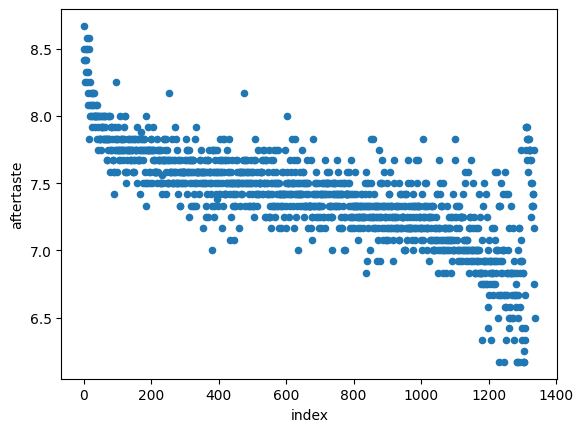

In [14]:
coffee_ratings_with_id = coffee_ratings.reset_index() 
coffee_ratings_with_id.plot(x="index", y="aftertaste", kind="scatter") 
plt.show() 

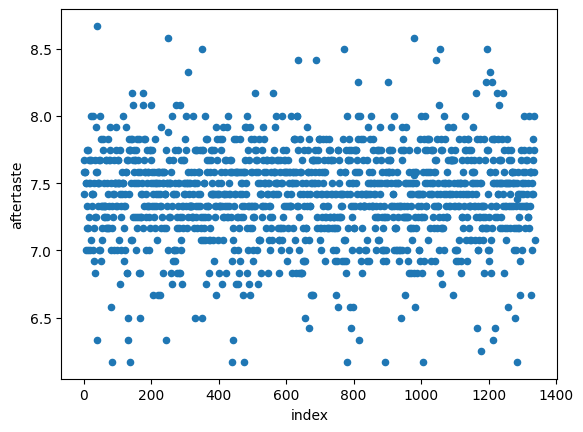

In [15]:
# shuffle the rows to ensure a same systematic sampling
shuffled = coffee_ratings.sample(frac=1)  # proportion of the dataset to return in the sample, 1 means randomly sample the whole dataset
shuffled = shuffled.reset_index(drop=True).reset_index()  # need reset the index so that row numbers are reordered
# replotting shows that we've mitigated the original order bias
shuffled.plot(x="index", y="aftertaste", kind="scatter") 
plt.show() 

## Sampling from the attrition data

In [16]:
attrition_pop = pd.read_feather('./data/attrition.feather')
attrition_pop.shape

(1470, 31)

In [17]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70, random_state=18900217)

# Print the sample
attrition_samp.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1134,35,0.0,Travel_Rarely,583,Research_Development,25,Master,Medical,High,Female,...,Excellent,High,1,16,3,Good,16,10,10,1
1150,52,0.0,Non-Travel,585,Sales,29,Master,Life_Sciences,Low,Male,...,Excellent,Medium,2,16,3,Good,9,8,0,0
531,33,0.0,Travel_Rarely,931,Research_Development,14,Bachelor,Medical,Very_High,Female,...,Excellent,Very_High,1,8,5,Better,8,7,1,6
395,31,0.0,Travel_Rarely,1332,Research_Development,11,College,Medical,High,Male,...,Excellent,Very_High,0,6,2,Good,6,5,0,1
392,29,0.0,Travel_Rarely,942,Research_Development,15,Below_College,Life_Sciences,Medium,Female,...,Excellent,Low,1,6,2,Good,5,4,1,3


### Systematic sampling of the attrition data

In [18]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp.head())

    Age  Attrition BusinessTravel  DailyRate            Department  \
0    21        0.0  Travel_Rarely        391  Research_Development   
21   19        0.0  Travel_Rarely       1181  Research_Development   
42   45        0.0  Travel_Rarely        252  Research_Development   
63   23        0.0  Travel_Rarely        373  Research_Development   
84   30        1.0  Travel_Rarely        945                 Sales   

    DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                 15        College  Life_Sciences                    High   
21                 3  Below_College        Medical                  Medium   
42                 2       Bachelor  Life_Sciences                  Medium   
63                 1        College  Life_Sciences               Very_High   
84                 9       Bachelor        Medical                  Medium   

    Gender  ...  PerformanceRating RelationshipSatisfaction  StockOptionLevel  \
0     Male  ...          Exce

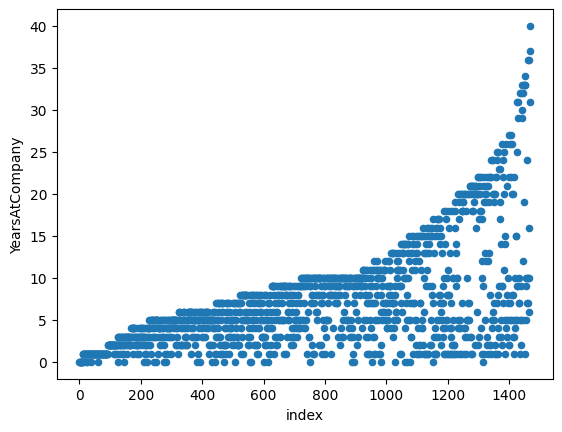

In [19]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

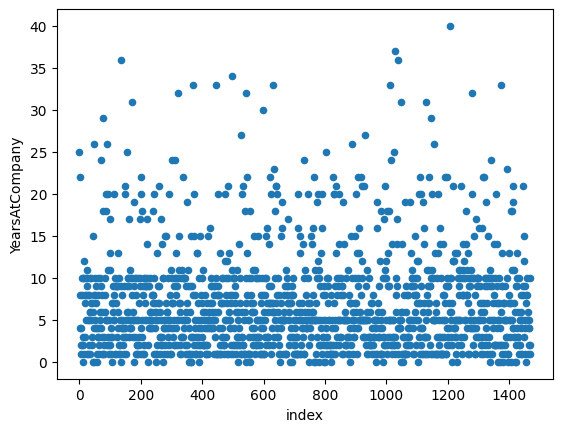

In [20]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index", y="YearsAtCompany", kind="scatter")
plt.show()

## Stratified and weighted random sampling

Stratified sampling is used when we are sampling from a population that contains a number of **subgroups**.


In [21]:
coffee_origins = coffee_ratings['country_of_origin'].unique()
print(f"There are {len(coffee_origins)} unique origins in the coffee dataset. These origins are:")
print(coffee_origins)

There are 37 unique origins in the coffee dataset. These origins are:
['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States'
 'United States (Hawaii)' 'Indonesia' 'China' 'Costa Rica' 'Mexico'
 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua' 'Tanzania, United Republic Of'
 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea' 'El Salvador'
 'Japan' 'Ecuador' 'United States (Puerto Rico)' 'Haiti' 'Burundi'
 'Vietnam' 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar'
 'Mauritius' 'Cote d?Ivoire' None 'India']


In [22]:
top_counts = coffee_ratings['country_of_origin'].value_counts()
top_counts.head(6)

country_of_origin
Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: count, dtype: int64

In [23]:
top_6_countries = ["Mexico", "Colombia", "Guatemala", "Brazil", "Taiwan", "United States (Hawaii)"]
# create binary filter vector
top_6_subset = coffee_ratings['country_of_origin'].isin(top_6_countries)
# top 6 subset of the population
coffee_ratings_top_6 = coffee_ratings[top_6_subset]
# a 10% sample from the top 5 subset
coffee_ratings_top_6_sample = coffee_ratings_top_6.sample(frac=0.1, random_state=2021)
# look at the proportions of the 10% sample
coffee_ratings_top_6_sample['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: proportion, dtype: float64

In [24]:
# look at the proportions from the population
coffee_ratings_top_6['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.268182
Colombia                  0.207955
Guatemala                 0.205682
Brazil                    0.150000
Taiwan                    0.085227
United States (Hawaii)    0.082955
Name: proportion, dtype: float64

In this sample, Taiwanese coffees form a **disproportionally low** percentage. This mismatch could lead to problems in our analysis. This is why, ideally, we would like the proportions of our sample to be the same as what we see in population.

In [25]:
# proportional stratified sampling - run groupby before sample
coffee_ratings_strat = coffee_ratings_top_6.groupby('country_of_origin').sample(frac=0.1, random_state=2021)
coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.272727
Colombia                  0.204545
Guatemala                 0.204545
Brazil                    0.147727
Taiwan                    0.090909
United States (Hawaii)    0.079545
Name: proportion, dtype: float64

### Notice how this above distribution more closely matches that of the population...

+ One variation of stratified sampling is sample **equal counts** from each group rather than equal proportions.
+ Another variation is **weighted random sampling** which requires us to specify weights to adjust the relative probability of a row being sampled
  + For example, suppose we wanted a higher proportion of Taiwanese coffees in the sample than in the population
  + Another example - weighted sampling is commoin in political polling, where we need to correct for under or over-represention of demographic groups

In [26]:
# equal counts stratified sampling - take a sample of 15 from each group
coffee_ratings_strat = coffee_ratings_top_6.groupby('country_of_origin').sample(n=15, random_state=2021)
# equal proportions from each group - since there are 6 group, each group will have 1/6 of the overall sample
coffee_ratings_strat['country_of_origin'].value_counts(normalize=True)

country_of_origin
Brazil                    0.166667
Colombia                  0.166667
Guatemala                 0.166667
Mexico                    0.166667
Taiwan                    0.166667
United States (Hawaii)    0.166667
Name: proportion, dtype: float64

In [27]:
coffee_ratings_weight = coffee_ratings_top_6.copy()  # need the copy here to avoid SettingWithCopyWarning
condition = coffee_ratings_weight['country_of_origin'] == "Taiwan"
# make selecting Taiwanese coffee twice as likely
coffee_ratings_weight['weight'] = np.where(condition, 2, 1)
# resample using the new weighting
coffee_ratings_weight = coffee_ratings_weight.sample(frac=0.1, weights='weight')
# Taiwan now has about 2x the proportion that it has for the population
coffee_ratings_weight['country_of_origin'].value_counts(normalize=True)

country_of_origin
Mexico                    0.306818
Taiwan                    0.193182
Brazil                    0.147727
Colombia                  0.136364
Guatemala                 0.136364
United States (Hawaii)    0.079545
Name: proportion, dtype: float64

## Proportional stratified sampling

If we are interested in subgroups within the population, then we may need to carefully control the counts of each subgroup within the population. Proportional stratified sampling results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.

In [28]:
# Proportion of employees by Education level
education_counts_pop = attrition_pop["Education"].value_counts(normalize=True)

# Print education_counts_pop
print(education_counts_pop, "\n")

# Proportional stratified sampling for 40% of each Education group - need to set observed=False to avoid FutureWarning
attrition_strat = attrition_pop.groupby("Education", observed=False)\
    .sample(frac=0.4, random_state=2022)

# Print the sample
print(attrition_strat, "\n")

# Calculate the Education level proportions from attrition_strat
education_counts_strat = attrition_strat['Education'].value_counts(normalize=True)

# Print education_counts_strat
print(education_counts_strat)

Education
Bachelor         0.389116
Master           0.270748
College          0.191837
Below_College    0.115646
Doctor           0.032653
Name: proportion, dtype: float64 

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1191   53        0.0      Travel_Rarely        238                 Sales   
407    29        0.0  Travel_Frequently        995  Research_Development   
1233   59        0.0  Travel_Frequently       1225                 Sales   
366    37        0.0      Travel_Rarely        571  Research_Development   
702    31        0.0  Travel_Frequently        163  Research_Development   
...   ...        ...                ...        ...                   ...   
733    38        0.0  Travel_Frequently        653  Research_Development   
1061   44        0.0  Travel_Frequently        602       Human_Resources   
1307   41        0.0      Travel_Rarely       1276                 Sales   
1060   33        0.0      Travel_Rarely        516  Research_Deve

## Equal counts stratified sampling

If one subgroup is larger than another subgroup in the population, but we don't want to reflect that difference in our analysis, then we can use **equal counts stratified sampling** to generate samples where each subgroup has the same amount of data. For example, if we are analyzing blood types, O is the most common blood type worldwide, but we may wish to have equal amounts of O, A, B, and AB in our sample.

In [29]:
# Get 30 employees from each Education group
attrition_eq = attrition_pop.groupby('Education', observed=False)\
	.sample(n=30, random_state=2022)      

# Get the proportions from attrition_eq
education_counts_eq = attrition_eq['Education'].value_counts(normalize=True)

# Print the results
print(education_counts_eq)

Education
Below_College    0.2
College          0.2
Bachelor         0.2
Master           0.2
Doctor           0.2
Name: proportion, dtype: float64


## Weighted sampling

Stratified sampling provides rules about the probability of picking rows from our dataset at the subgroup level. A generalization of this is weighted sampling, which lets us specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.

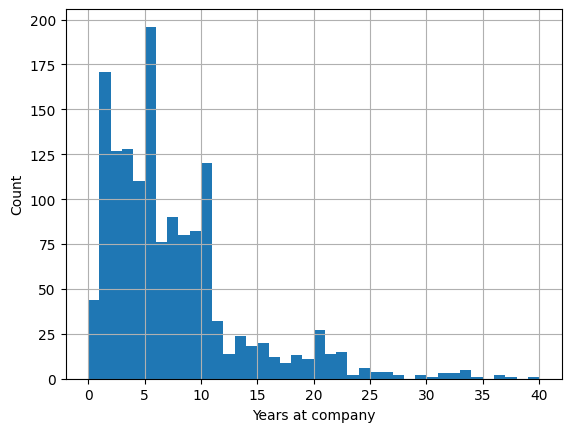

In [30]:
# Plot YearsAtCompany from attrition_pop as a histogram
ax = attrition_pop["YearsAtCompany"].hist(bins = np.arange(0, 41, 1))
ax.set_xlabel("Years at company")
ax.set_ylabel("Count")
plt.show()

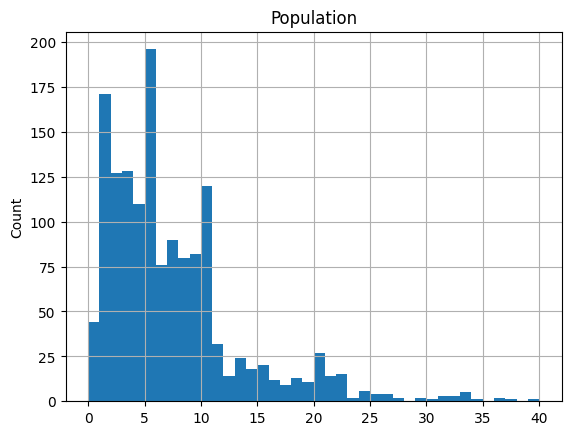

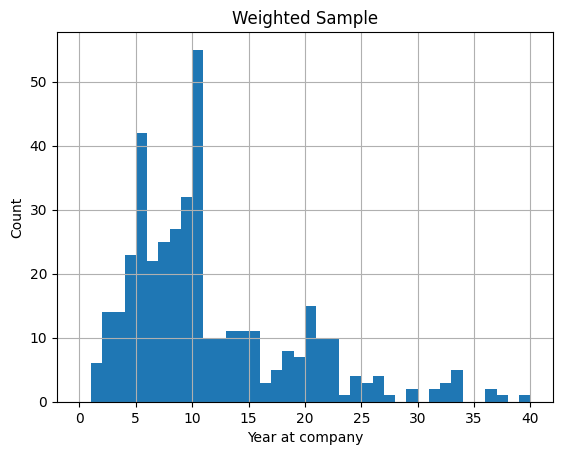

In [31]:
# Plot YearsAtCompany from attrition_pop as a histogram
ax_top = attrition_pop['YearsAtCompany'].hist(bins=np.arange(0, 41, 1))
ax_top.set_title("Population")
ax_top.set_ylabel("Count")
plt.show()

# Sample 400 employees weighted by YearsAtCompany
attrition_weight = attrition_pop.sample(n=400, weights="YearsAtCompany")

# Plot YearsAtCompany weighted sample
ax_bot = attrition_weight["YearsAtCompany"].hist(bins=np.arange(0, 41, 1))
ax_bot.set_title("Weighted Sample")
ax_bot.set_ylabel("Count")
ax_bot.set_xlabel("Year at company")
plt.show()

## Cluster sampling

One problem with stratified sampling is that we need to collect datafrom each subgroup. Since collecting this data is often expensive, it would be useful to have an alternative. **Cluster sampling** uses random sampling to select **some** of the subgroups and then uses random sampling within only those subgroups. These are the steps we follow for cluster sampling:

1. sample for subgroups
2. sample each of the selected groups in 1.

In [32]:
varieties_pop = coffee_ratings['variety'].unique()
print(f"There are {len(varieties_pop) - 2} (exluding `None` and `Other`) varieties of coffee in the dataset.\n")
print(varieties_pop)

There are 28 (exluding `None` and `Other`) varieties of coffee in the dataset.

[None 'Other' 'Bourbon' 'Catimor' 'Ethiopian Yirgacheffe' 'Caturra' 'SL14'
 'Sumatra' 'SL34' 'Hawaiian Kona' 'Yellow Bourbon' 'SL28' 'Gesha' 'Catuai'
 'Pacamara' 'Typica' 'Sumatra Lintong' 'Mundo Novo' 'Java' 'Peaberry'
 'Pacas' 'Mandheling' 'Ruiru 11' 'Arusha' 'Ethiopian Heirlooms'
 'Moka Peaberry' 'Sulawesi' 'Blue Mountain' 'Marigojipe' 'Pache Comun']


In [33]:
# 1. sample for subgroups - select 3 subgroups for this example
import random
random.seed(2025)
varieties_samp = random.sample(list(varieties_pop), k=3)
print(varieties_samp)  # no seed was set in the lecture video, so results will differ

# 2. sample each of the selected groups
variety_condition = coffee_ratings['variety'].isin(varieties_samp)  # create binary vector to use for filtering
print(f"cluster sample count: {variety_condition.sum()}")
coffee_ratings_cluster = coffee_ratings[variety_condition]
print(f"Row count of cluster sample BEFORE removing unused categories: {coffee_ratings_cluster.shape[0]}")
# ensure that isin filtering removes levels with 0 rows - prevents error if attempting to sample from a category with no samples in it
coffee_ratings_cluster.loc[:, ['variety']] = coffee_ratings_cluster['variety'].astype('category').cat.remove_unused_categories()
print(f"Row count of cluster sample AFTER removing unused categories: {coffee_ratings_cluster.shape[0]}")
# equal count sampling within the selected varieties
coffee_ratings_cluster_sample = coffee_ratings_cluster.groupby("variety")\
                                    .sample(n=5, random_state=2021)
coffee_ratings_cluster_sample  # n x k = 5 x 3 = 15 rows

['Mundo Novo', 'Bourbon', 'Pacas']
cluster sample count: 272
Row count of cluster sample BEFORE removing unused categories: 272
Row count of cluster sample AFTER removing unused categories: 272


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
575,82.83,Arabica,juan luis alvarado romero,Guatemala,agropecuaria quiagral,None,beneficio ixchel,11/23/0934,"unex guatemala, s.a.",4300,...,Green,10.0,"July 9th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1310.64,1310.64,1310.64
560,82.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0513,beneficio ixchel,11/23/0513,"unex guatemala, s.a.",1700,...,Green,2.0,"June 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
524,83.00,Arabica,juan luis alvarado romero,Guatemala,la igualdad,None,beneficio la igualdad,11/194/07,"nuevos mercados, s.a.",4500,...,Green,2.0,"April 27th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,ft,1371.60,1371.60,1371.60
1140,79.83,Arabica,juan luis alvarado romero,Guatemala,piamonte,11/23/0639,beneficio ixchel,11/23/0639,"unex guatemala, s.a.",1700,...,Green,2.0,"August 22nd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.00,1700.00,1700.00
318,83.67,Arabica,ipanema coffees,Brazil,capoeirinha,008/16A,dry mill,002/1660/0106,ipanema coffees,934,...,Green,3.0,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,934.00,934.00,934.00
1137,79.92,Arabica,jesus carlos cadena valdivia,Mexico,finca huehuetecpan,None,"cosautlan de carvajal, veracruz, méxico",1104387103,cafetalera la asunción s.a. de c.v.,1250,...,Green,0.0,"July 11th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1250.00,1250.00,1250.00
987,81.08,Arabica,gregorio sebba,Brazil,fazenda são josé mirante,14,garca armazens,None,garca armazens,695,...,Green,8.0,"June 21st, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,695.00,695.00,695.00
1201,79.00,Arabica,gonzalo de aquino flores,Mexico,None,None,"iliatenco, guerrero",0,café monteabuelo s.a. de c.v.,1300,...,None,12.0,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1300.00,1300.00,1300.00
713,82.33,Arabica,bourbon specialty coffees,Brazil,None,None,None,002/4542/0478,bourbon specialty coffees,None,...,Green,10.0,"April 19th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,NaN,NaN,NaN
864,81.75,Arabica,sergio landa alarcon,Mexico,finca tepictla,None,tepictla y xalapa veracruz,1104372561,None,1250,...,Green,23.0,"September 10th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1250.00,1250.00,1250.00


## Cluster sampling is a special case of multistage sampling

We used 2 stages in the previous example, but we could have used more than 2. For example, countrywide surveys may sample from nested subgroups such as states, counties, cities, and neighborhoods.

In [34]:
# cluster sampling on attrition data
random.seed(19790801)

# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop['JobRole'].unique())

# Randomly sample 4 JobRole types
job_roles_samp = random.sample(job_roles_pop, k=4)

# Print the result
print(job_roles_samp)

# Filter for rows where JobRole is in job_roles_samp
attrition_pop['JobRole'] = attrition_pop['JobRole'].astype('category')
jobrole_condition = attrition_pop['JobRole'].isin(job_roles_samp)

attrition_filtered = attrition_pop[jobrole_condition]
attrition_filtered.loc[:, ['JobRole']] = attrition_filtered['JobRole'].astype('category')

# Print the result
print(attrition_filtered.head())

['Research_Director', 'Research_Scientist', 'Human_Resources', 'Manager']
    Age  Attrition BusinessTravel  DailyRate            Department  \
0    21        0.0  Travel_Rarely        391  Research_Development   
5    27        0.0     Non-Travel        443  Research_Development   
6    18        0.0     Non-Travel        287  Research_Development   
10   18        0.0     Non-Travel       1431  Research_Development   
17   31        0.0  Travel_Rarely       1082  Research_Development   

    DistanceFromHome Education EducationField EnvironmentSatisfaction  Gender  \
0                 15   College  Life_Sciences                    High    Male   
5                  3  Bachelor        Medical               Very_High    Male   
6                  5   College  Life_Sciences                  Medium    Male   
10                14  Bachelor        Medical                  Medium  Female   
17                 1    Master        Medical                    High    Male   

    ...  Performan

In [35]:
attrition_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       526 non-null    int32   
 1   Attrition                 526 non-null    float64 
 2   BusinessTravel            526 non-null    category
 3   DailyRate                 526 non-null    int32   
 4   Department                526 non-null    category
 5   DistanceFromHome          526 non-null    int32   
 6   Education                 526 non-null    category
 7   EducationField            526 non-null    category
 8   EnvironmentSatisfaction   526 non-null    category
 9   Gender                    526 non-null    category
 10  HourlyRate                526 non-null    int32   
 11  JobInvolvement            526 non-null    category
 12  JobLevel                  526 non-null    int32   
 13  JobRole                   526 non-null    category
 14

In [36]:
# Remove categories with no rows
# attrition_filtered['JobRole'] = attrition_filtered['JobRole'].cat.remove_unused_categories()  # generates SettingWithCopyWarning
# attrition_filtered.loc[:, ['JobRole']] = attrition_filtered['JobRole'].cat.remove_unused_categories() # FutureWarning even though JobRole is dtype category
# manually remove the unsused categories because remove_unused_categories isn't working as expected
attrition_filtered.loc[:, ['JobRole']] = attrition_filtered['JobRole']\
    .cat.remove_categories(removals = ["Healthcare_Representative", "Laboratory_Technician",
                                       "Manufacturing_Director", "Sales_Executive", "Sales_Representative"])
# above 3 lines generate FutureWarning ...please explicitly cast to a compatible dtype first, but JobRoles is dtype category

print(attrition_filtered["JobRole"].value_counts(), '\n')

# Randomly sample 10 employees from each sampled job role
# attrition_clust = attrition_filtered.groupby("JobRole").sample(n=10, random_state=2022)  # generates FutureWarning: The default of observed=False is deprecated
attrition_clust = attrition_filtered.groupby("JobRole", observed=False).sample(n=10, random_state=2022)

# Print the sample
print(attrition_clust.head())

JobRole
Research_Scientist    292
Manager               102
Research_Director      80
Human_Resources        52
Name: count, dtype: int64 

      Age  Attrition     BusinessTravel  DailyRate       Department  \
1348   44        1.0      Travel_Rarely       1376  Human_Resources   
886    41        0.0         Non-Travel        552  Human_Resources   
983    39        0.0      Travel_Rarely        141  Human_Resources   
88     27        1.0  Travel_Frequently       1337  Human_Resources   
189    34        0.0      Travel_Rarely        829  Human_Resources   

      DistanceFromHome Education   EducationField EnvironmentSatisfaction  \
1348                 1   College          Medical                  Medium   
886                  4  Bachelor  Human_Resources                    High   
983                  3  Bachelor  Human_Resources                    High   
88                  22  Bachelor  Human_Resources                     Low   
189                  3   College  Human_Resource

C:\Users\Owner\AppData\Local\Temp\ipykernel_18616\663922893.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Research_Scientist', 'Research_Scientist', 'Research_Scientist', 'Research_Scientist', 'Research_Scientist', ..., 'Manager', 'Manager', 'Manager', 'Manager', 'Research_Director']
Length: 526
Categories (4, object): ['Human_Resources', 'Manager', 'Research_Director', 'Research_Scientist']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  attrition_filtered.loc[:, ['JobRole']] = attrition_filtered['JobRole']\


## Review of sampling techniques

In [37]:
top_counted_countries = ["Mexico", "Colombia", "Guatemala", "Brazil", "Taiwan", "United States (Hawaii)"]
columns_of_interest = ["total_cup_points", "variety", "country_of_origin", "aroma", "flavor",
                       "aftertaste", "body", "balance"]

# print(coffee_ratings.columns)
coffee_ratings = coffee_ratings.loc[:, columns_of_interest]  # need this to get same result as shown in slide

subset_condition = coffee_ratings['country_of_origin'].isin(top_counted_countries)
coffee_ratings_top = coffee_ratings[subset_condition]

coffee_ratings_top.shape

(880, 8)

In [38]:
# simple random sampling
coffee_ratings_srs = coffee_ratings_top.sample(frac=1/3, random_state=2021)
coffee_ratings_srs.shape  # 880 * 1/3 = 293.333... (round down, floor)

(293, 8)

In [39]:
# stratified sampling - groupby the subgroup before doing a simple random sampling on each subgroup
coffee_ratings_strat = coffee_ratings_top.groupby("country_of_origin")\
    .sample(frac=1/3, random_state=2021)  # note that frac here is still over the total number of sample
coffee_ratings_strat.shape                # which is why we should get the same number as with simple

(293, 8)

In [40]:
# pd.set_option('display.max_rows', None)
# coffee_ratings_strat.to_csv('./data/coffee_ratings_strat.csv')

### Warning, the code provided in this lecture turns out to be super brittle...

Several adaptations have been made so that it doesn't generate errors

In [41]:
coffee_ratings_top['country_of_origin'].value_counts()

country_of_origin
Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: count, dtype: int64

In [42]:
# cluster sampling
# random.seed(2021)
# top_countries_samp = random.sample(top_counted_countries, k=2)  # select 2 groups at random
top_countries_samp = ["Colombia", "Mexico"]  # so we get same thing as slides
print(f"Countries selected for cluster sampling: {top_countries_samp}")
top_condition = coffee_ratings_top['country_of_origin'].isin(top_countries_samp)  # filter for the selected groups
coffee_ratings_cluster = coffee_ratings_top[top_condition]

Countries selected for cluster sampling: ['Colombia', 'Mexico']


In [43]:
# remove unused categories to avoid attempting to sample from an empty category
# coffee_ratings_cluster['country_of_origin'] = coffee_ratings_cluster['country_of_origin'].cat.remove_unused_categories()

print(f"There are {len(coffee_ratings_top)} samples in coffee_ratings_top")
print(f"There are {len(coffee_ratings_cluster)} samples in coffee_ratings_cluster")

coffee_ratings_clust = coffee_ratings_cluster.groupby("country_of_origin")\
    .sample(n=len(coffee_ratings_top) // 6)

print(coffee_ratings_clust["country_of_origin"].value_counts())
print(coffee_ratings_clust.shape)

There are 880 samples in coffee_ratings_top
There are 419 samples in coffee_ratings_cluster
country_of_origin
Colombia    146
Mexico      146
Name: count, dtype: int64
(292, 8)


### Compare population mean with 3 sample means

In [44]:
print(f"population mean: {coffee_ratings_top['total_cup_points'].mean()}")
print(f"simple random sample mean: {coffee_ratings_srs['total_cup_points'].mean()}")
print(f"stratified sample mean: {coffee_ratings_strat['total_cup_points'].mean()}")
print(f"cluster sample mean: {coffee_ratings_clust['total_cup_points'].mean()}")  # not bad for having about half the samples of the other 2 methods

population mean: 81.94700000000002
simple random sample mean: 81.91331058020478
stratified sample mean: 81.92566552901025
cluster sample mean: 82.03171232876713


## Mean cup points by country: simple random


In [45]:
print(coffee_ratings_top.groupby("country_of_origin")['total_cup_points'].mean(), '\n')
print(coffee_ratings_srs.groupby("country_of_origin")['total_cup_points'].mean(), '\n')

country_of_origin
Brazil                    82.405909
Colombia                  83.106557
Guatemala                 81.846575
Mexico                    80.890085
Taiwan                    82.001333
United States (Hawaii)    81.820411
Name: total_cup_points, dtype: float64 

country_of_origin
Brazil                    82.251875
Colombia                  82.961014
Guatemala                 81.392917
Mexico                    81.152000
Taiwan                    81.957391
United States (Hawaii)    81.766400
Name: total_cup_points, dtype: float64 



## Mean cup points by country: stratified

In [46]:
print(coffee_ratings_top.groupby("country_of_origin")['total_cup_points'].mean(), '\n')
print(coffee_ratings_strat.groupby("country_of_origin")['total_cup_points'].mean(), '\n')

country_of_origin
Brazil                    82.405909
Colombia                  83.106557
Guatemala                 81.846575
Mexico                    80.890085
Taiwan                    82.001333
United States (Hawaii)    81.820411
Name: total_cup_points, dtype: float64 

country_of_origin
Brazil                    82.499773
Colombia                  83.288197
Guatemala                 81.727667
Mexico                    80.994684
Taiwan                    81.846800
United States (Hawaii)    81.051667
Name: total_cup_points, dtype: float64 



## Mean cup points by country: cluster

In [47]:
print(coffee_ratings_top.groupby("country_of_origin")['total_cup_points'].mean(), '\n')
print(coffee_ratings_clust.groupby("country_of_origin")['total_cup_points'].mean(), '\n')

country_of_origin
Brazil                    82.405909
Colombia                  83.106557
Guatemala                 81.846575
Mexico                    80.890085
Taiwan                    82.001333
United States (Hawaii)    81.820411
Name: total_cup_points, dtype: float64 

country_of_origin
Colombia    83.010753
Mexico      81.052671
Name: total_cup_points, dtype: float64 

